***Insert Names Here***

# In Class Actvity on Error Propagation - Solutions
## April 3, 2019

In [1]:
#various things that we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st

In [2]:
# these set the pandas defaults so that it will print ALL values, even for very long lists and large dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#read in the data, skipping the first 73 rows of ancillary information
data=pd.read_csv('planets030619.csv', skiprows=72)
print(data.shape)

(3924, 68)


In [4]:
#a modified filter function
def filter(df, col, val):
    df2=df[df[col]>=val]
    return df2

In [5]:
#get rid of everything that doesn't have a mass, then everything that doesn't have a radius
data=filter(data,"pl_bmassj",0)
print(data.shape)
data=filter(data,"pl_radj",0)
print(data.shape)

(1511, 68)
(665, 68)


In [6]:
#remember what the columns in the dataframe are
data.columns

Index(['pl_hostname', 'pl_letter', 'pl_name', 'pl_discmethod',
       'pl_controvflag', 'pl_pnum', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_orbeccen', 'pl_orbeccenerr1',
       'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_orbincl', 'pl_orbinclerr1',
       'pl_orbinclerr2', 'pl_orbincllim', 'pl_bmassj', 'pl_bmassjerr1',
       'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_radj',
       'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_dens', 'pl_denserr1',
       'pl_denserr2', 'pl_denslim', 'pl_ttvflag', 'pl_kepflag', 'pl_k2flag',
       'pl_nnotes', 'ra_str', 'ra', 'dec_str', 'dec', 'st_dist', 'st_disterr1',
       'st_disterr2', 'st_distlim', 'st_optmag', 'st_optmagerr',
       'st_optmaglim', 'st_optband', 'gaia_gmag', 'gaia_gmagerr',
       'gaia_gmaglim', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim',
       'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st

<div class=hw>
### Exercises
------------------

1) From the mass and radius columns, compute a new column that contains the density of the planets following the standard formula for density, namely: $$\rho = \frac{M}{\frac{4}{3}\pi r^3}$$
2) Investigate the nature of the "error1" and "error2" columns for each key variable. Why are there two for every measurement and how are they related? In what situations might it be useful to express error in this way?    
3) Compute new total error columns for the mass and radius of the planets using both of the errors for those quantities in the table    
4) Compute another new column with the error on the density measurement that you computed. Use the equation that you derived in class to propagate the errors property and your total errors on the mass and radius computed in 3   
5) Make scatter plots of your computed densities vs. the densities in the table (pl_dens) and your errors on density vs. the density errors in the table (combine them, as you did in 3). What trends do you note? Are the x and y axis values/ranges the same? Why or why not do you think? Do they lie along a perfectly straight line? Why or why not, do you think?

In [7]:
m_jup = 1.898e30 #g
r_jup = 6.991e9 #cm
data["mydensity"] = data["pl_bmassj"]*m_jup/(4/3*np.pi*(data["pl_radj"]*r_jup)**3) 

In [8]:
data["totalmasserr"]=(data["pl_bmassjerr1"]+abs(data["pl_bmassjerr2"]))*m_jup
data["totalraderr"]=(data["pl_radjerr1"]+abs(data["pl_radjerr2"]))*r_jup

In [9]:
data["densityerr"]=np.sqrt(9*data["mydensity"]**2*((data["totalmasserr"]/(3*data["pl_bmassj"]*m_jup))**2+
                                                   (data["totalraderr"]/(data["pl_radj"]*r_jup)**2)))

In [10]:
data["totaldenserr"]=data["pl_denserr1"]+abs(data["pl_denserr2"])

In [11]:
print(1.5/6.4)

0.234375


(0, 20)

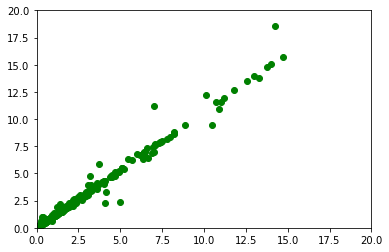

In [12]:
plt.plot(data["pl_dens"],data["mydensity"], 'go')
plt.xlim(0,20)
plt.ylim(0,20)

(0, 20)

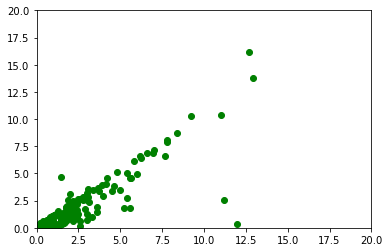

In [13]:
plt.plot(data["totaldenserr"],data["densityerr"], 'go')
plt.xlim(0,20)
plt.ylim(0,20)

In [14]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../custom.css", "r").read()
    return HTML(styles)
css_styling()